# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [76]:
# Import your libraries
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binom
import seaborn as sns

# Challenge 1 - Generate and Plot Normal Distributions

#### Step 1: Generate samples and test normal distribution

Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed. Test your normal distributions with [`scipy.stats.normaltest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html).


*Hint: Read the documentation for `scipy.stats.normaltest`. The function does not simply return Yes or No for whether your data is normal distribution. It returns the likelihood.*

In [63]:
# Your code here
a = np.random.normal(50,5,size=10)
b = np.random.normal(50,5,size=50)
c = np.random.normal(50,5,size=500)
d = np.random.normal(50,5,size=1000)

x = np.concatenate((a, b, c, d))
k2, p = stats.normaltest(x)
alpha = 1e-3
print("p = {:g}".format(p), f'k2 ={k2}')
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

p = 0.155478 k2 =3.7224971346205638
The null hypothesis cannot be rejected


#### Interpret the normaltest results and make your observations.

In [ ]:
# Explain the test results here


#### Step 2: Plot normal distributions

Use matplotlib subplots to plot a histogram of each sample. 

*Hints:*
- Use subplots to compare your figures side by side.

- Your output should look like below:

![normal distributions with different sample sizes](ch-1.png)

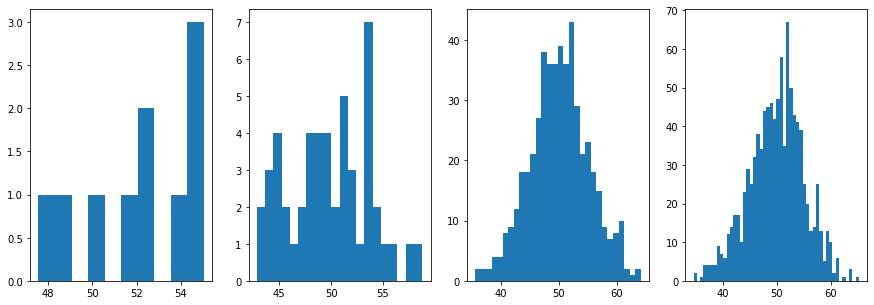

In [71]:
# Your code here
plt.figure(figsize=(15,5))
plt.subplot(1,4,1)
plt.hist(a, bins=10)
plt.subplot(1,4,2)
plt.hist(b, bins=20)
plt.subplot(1,4,3)
plt.hist(c, bins=30)
plt.subplot(1,4,4)
plt.hist(d, bins=50);

#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

In [ ]:
# Your comment and explanation here


# Challenge 2 - Plot Probability Mass Function (PMF)

#### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

#### Question: We assume that the probability of clicking an Ad in a Youtube video is 0.15. We have a sample of 5 people who wathched the video and we want to plot the PMF for a binomial distribution.

*Hint: use binom from `scipy.stats.binom`. Your output should look like below:*

![binom 10](ch-2.png)

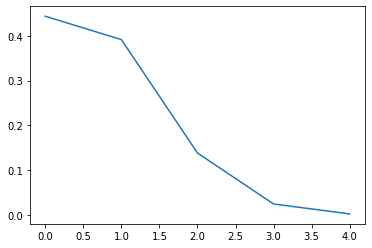

In [123]:
# Your code here
n = 5
p = 0.15
x = range(n)
data_binom = binom.pmf(x,n,p)

plt.plot(data_binom)

#### Explain what you observe from the plot above

In [ ]:
# Your comment here

#### Now plot PMF with 50, 500, and 5000 visitors.

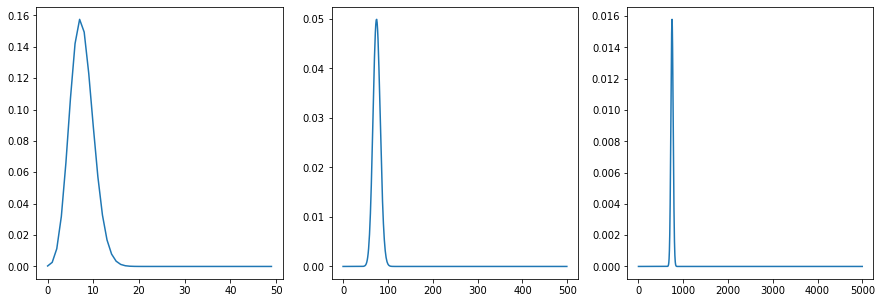

In [121]:
# Your code here
plt.figure(figsize=(15,5))

n = 50
p = 0.15
x = range(n)
data_binom = binom.pmf(x, n, p)
plt.subplot(1,3,1)
plt.plot(data_binom)


n = 500
p = 0.15
x = range(n)
data_binom = binom.pmf(x, n, p)
plt.subplot(1,3,2)
plt.plot(data_binom)


n = 5000
p = 0.15
x = range(n)
data_binom = binom.pmf(x, n, p)
plt.subplot(1,3,3)
plt.plot(data_binom)


#### What did you notice from the distribution plots? Comment your findings.

In [ ]:
# Your comment here


# Challenge 3

#### Reaserch the Poisson distribution. Write about your own understanding of the Poisson distribution.

In [ ]:
# Your comment here

#### A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

*Hint: use `scipy.stats.poisson`*

In [ ]:
# Your code here

#### What is the probability of getting 60 visits?

In [ ]:
# Your code here

#### Plot the distribution of the probability for getting 0-1000 visits.

*Hints:* 

- Create a list to store the Poisson distribution probabilities for n=0 to 1000. Then plot the probabilities.

- Your plot should look like below:

![poisson distribution](ch-3.png)

In [ ]:
# your code here
